Recap

In [1]:
import matplotlib.pyplot as plt 

In [2]:
x=[4,7,9,12]

y=[6,9,6,10]

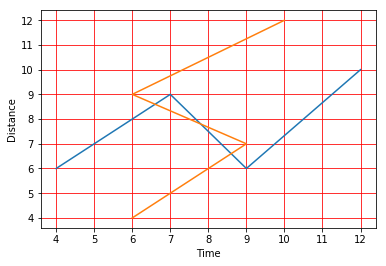

In [3]:
plt.xlabel('Time')
plt.ylabel('Distance')
plt.grid(c='red')
plt.plot(x,y)  #  to plot graph in maths way
plt.plot(y,x)
#plt.bar(x,y) #  to plot graph in bar format 
#plt.bar(y,x)
#plt.show()   #  to show the same

#Visualization

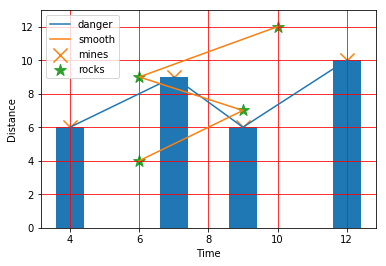

In [4]:
#!/usr/bin/env python3
import matplotlib.pyplot   as  plt
import  mpld3
x=[4,7,9,12]
y=[6,9,6,10]

players=["virat","dhoni","pa"]
runs=[400,450,66]

plt.xlabel('Time')
plt.ylabel('Distance')
plt.grid(c='red')
plt.plot(x,y,label="danger")  #  to plot graph in maths way
plt.plot(y,x,label="smooth")
plt.bar(x,y) #  to plot graph in bar format 
#plt.bar(players,runs) #  to plot graph in bar format 
#plt.bar(y,x)
plt.scatter(x,y,s=200,marker='x',label="mines")
plt.scatter(y,x,s=150,marker='*',label="rocks")
plt.legend() #to show scale and  values
plt.show()
#mpld3.show()# to bring plot as  a popup


In [5]:
#iris dataset

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree

In [11]:
iris=load_iris()
dir(iris)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [25]:
#feature
feature=iris.data
#label
label=iris.target
#calling classifier
algo=tree.DecisionTreeClassifier()
#training algo
trained_algo=algo.fit(feature,label)
output=trained_algo.predict([[7.1, 3. , 5.9, 2.1]])
print(output)



[2]


In [26]:
#handwritten recognnition


In [98]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import  cv2
import numpy as np
digit=load_digits()
dir(digit)

['DESCR', 'data', 'images', 'target', 'target_names']

In [93]:
#  now  splitting  training and testing dataset testing data 10% 
split_data=train_test_split(digit.data,digit.target,test_size=0.3)
train_data,test_data,train_target,test_target=split_data
features=train_data
label=train_target

#calling algorithm
algo=SVC()
trained_algo=algo.fit(features,label)
output=trained_algo.predict(test_data)
result=accuracy_score(test_target,output)
print("Accuracy score is:",result)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score is: 0.42592592592592593


In [97]:
#!/usr/bin/env python3

import  cv2
import numpy as np
import os
cap=cv2.VideoCapture(0)
#cap=cv2.VideoCapture("https://192.168.43.1:8080/video")
#Trainnig our classifier for face detection using haar file(.xml)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
font=cv2.FONT_ITALIC
while cap.isOpened():
    status,frame=cap.read()
    #grayimg=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(frame,1.15,5) 
    for  (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2) 
        #fo_gray=grayimg[y:y+h,x:x+w]
        #fo_color=frame[y:y+h,x:x+w]
    msg="Face Detected="+str(len(faces))
    #puttext(image,msg,(coordinate),fonttype,fontscale,fontcolor,linetype
    cv2.putText(frame,msg,(10,50),font,1,(120,0,255),3,cv2.LINE_AA)	
    cv2.imshow('Detect',frame)
    #cv2.imshow('Gray',fo_gray)
    #cv2.imshow('FaceOnly',fo_color)
    if cv2.waitKey(30) & 0xff ==ord('q'):
        break
voice_output="echo Headcount was "+str(len(faces))+" | festival --tts"
os.system(voice_output)
cv2.destroyAllWindows()
cap.release()
'''
cv2.imshow('gray',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


    scaleFactor: Parameter specifying how much the image size is reduced at each image scale.
    minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have'''

"\ncv2.imshow('gray',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\n\n    scaleFactor: Parameter specifying how much the image size is reduced at each image scale.\n    minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have"